<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/House_Pricing_DASC_1003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Housing_Price_Data.csv')

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [18]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [20]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [21]:
df.shape

(545, 13)

In [22]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [23]:
df['total_rooms']=df['bedrooms'] + df['bathrooms']

In [24]:
df['price_per_sqft']=df['price']/df['area']

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price_per_sqft
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6,1792.452830
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8,1367.187500
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5,1229.919679
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6,1628.666667
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5,1537.735849


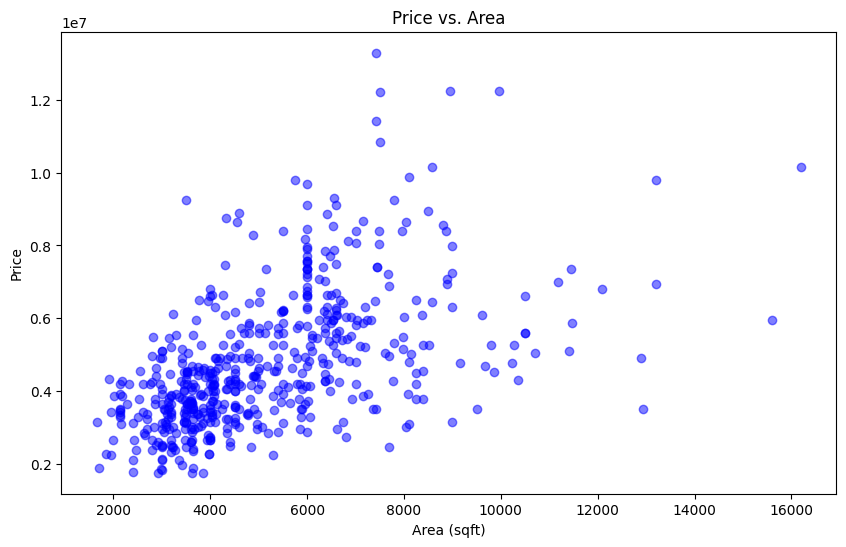

In [26]:

plt.figure(figsize=(10, 6))  # Create a new figure with a specific size (10 inches wide and 6 inches tall)
plt.scatter(df['area'], df['price'], color='blue', alpha=0.5)  # Create a scatter plot
# 'area' values on the x-axis, 'price' values on the y-axis
# 'color' parameter sets the color of the data points to blue
# 'alpha' parameter sets the transparency of the data points to 50%
plt.title('Price vs. Area')  # Set the title of the plot
plt.xlabel('Area (sqft)')  # Set the label for the x-axis
plt.ylabel('Price')  # Set the label for the y-axis
plt.show()  # Display the plot



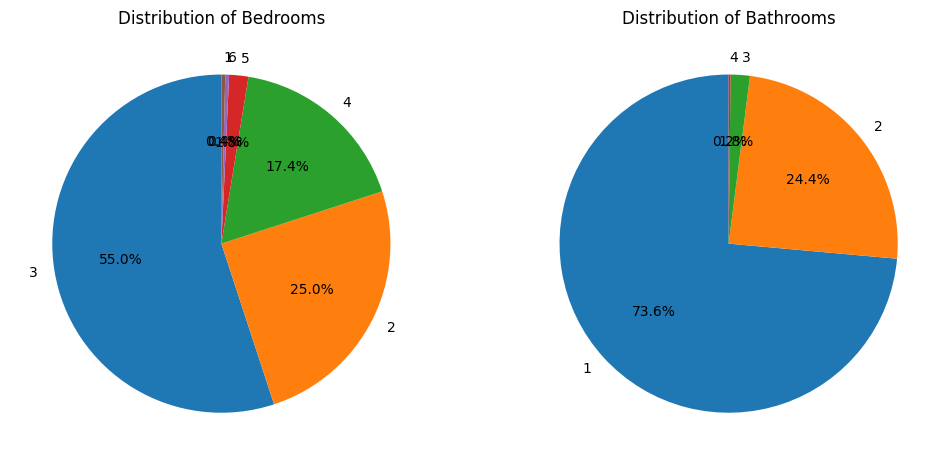

In [27]:
bedroom_counts = df['bedrooms'].value_counts()  # Count the occurrences of each unique value in the 'bedrooms' column
bathroom_counts = df['bathrooms'].value_counts()  # Count the occurrences of each unique value in the 'bathrooms' column

# Create a new figure with two subplots (1 row, 2 columns) and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a pie chart for the 'bedrooms' data
axes[0].pie(bedroom_counts, labels=bedroom_counts.index, autopct='%1.1f%%', startangle=90)
# 'bedroom_counts' are the data values to be plotted
# 'labels=bedroom_counts.index' specifies the labels for each slice of the pie chart
# 'autopct='%1.1f%%'' displays the percentage value of each slice with one decimal point
# 'startangle=90' sets the starting angle for the pie chart

axes[0].set_title('Distribution of Bedrooms')  # Set the title for the first subplot

# Create a pie chart for the 'bathrooms' data
axes[1].pie(bathroom_counts, labels=bathroom_counts.index, autopct='%1.1f%%', startangle=90)
# 'bathroom_counts' are the data values to be plotted
# 'labels=bathroom_counts.index' specifies the labels for each slice of the pie chart
# 'autopct='%1.1f%%'' displays the percentage value of each slice with one decimal point
# 'startangle=90' sets the starting angle for the pie chart

axes[1].set_title('Distribution of Bathrooms')  # Set the title for the second subplot

plt.show()  # Display the plot




<Figure size 1000x600 with 0 Axes>

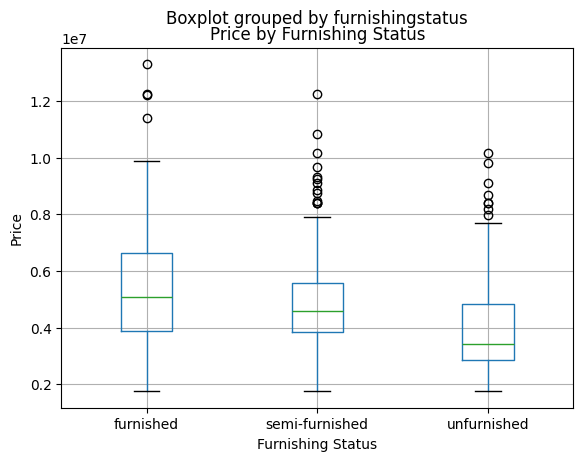

In [28]:
plt.figure(figsize=(10, 6))  # Create a new figure with a specific size (10 inches wide and 6 inches tall)
df.boxplot(column='price', by='furnishingstatus')  # Create a box plot of 'price' by 'furnishingstatus'
# 'column' parameter specifies the column to plot (price)
# 'by' parameter specifies the column to group by (furnishingstatus)
plt.title('Price by Furnishing Status')  # Set the title of the plot
plt.xlabel('Furnishing Status')  # Set the label for the x-axis
plt.ylabel('Price')  # Set the label for the y-axis
plt.show()  # Display the plot




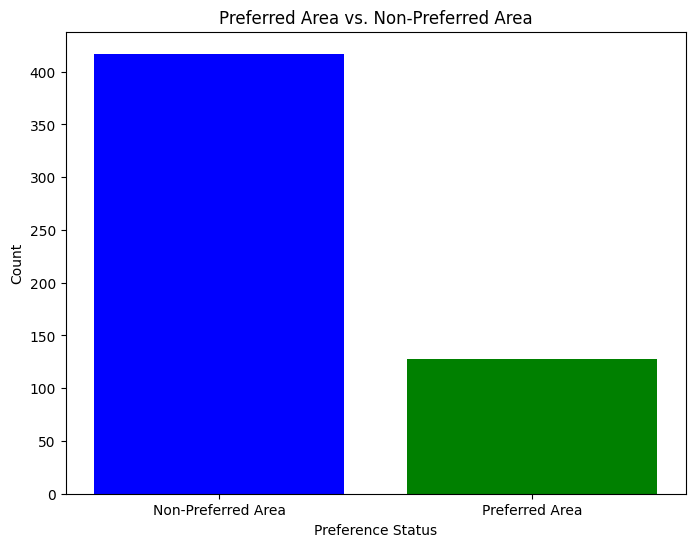

In [29]:
prefarea_counts = df['prefarea'].value_counts()  # Count the occurrences of each unique value in the 'prefarea' column

plt.figure(figsize=(8, 6))  # Create a new figure with a specific size (8 inches wide and 6 inches tall)

# Create a bar chart for 'prefarea' data
plt.bar(prefarea_counts.index, prefarea_counts, color=['blue', 'green'])  # Bar chart for 'prefarea' data
# 'prefarea_counts.index' are the x-values (categories: Non-Preferred Area, Preferred Area)
# 'prefarea_counts' are the y-values (counts of properties in each category)

plt.title('Preferred Area vs. Non-Preferred Area')  # Set the title of the plot
plt.xlabel('Preference Status')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis

# Set custom tick labels for x-axis
plt.xticks([0, 1], ['Non-Preferred Area', 'Preferred Area'])

plt.show()

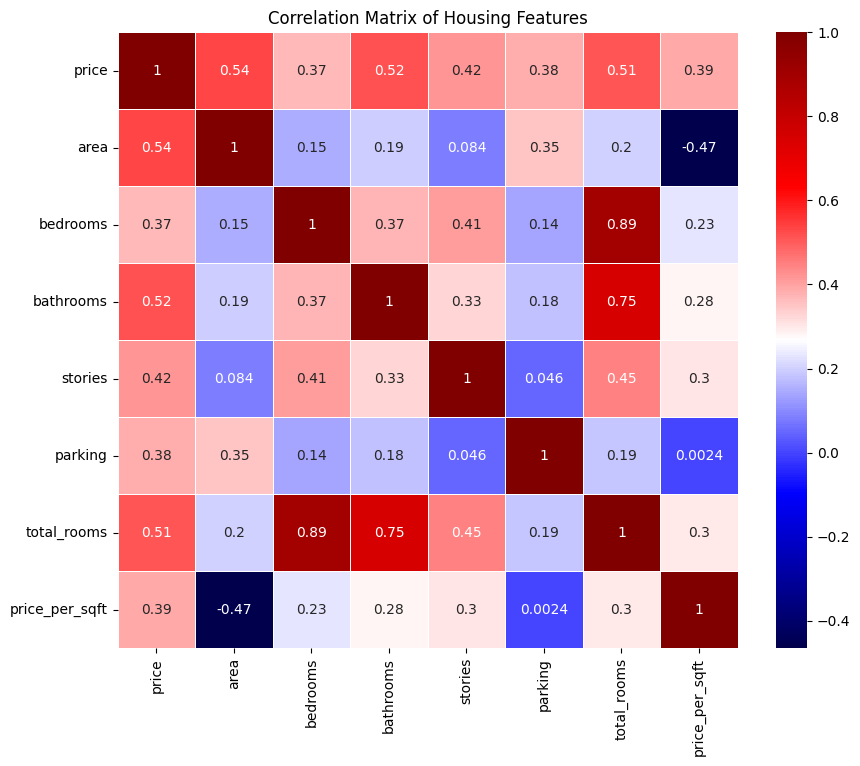

In [30]:
correlation_matrix = df.corr(method='pearson', min_periods=1,numeric_only=bool)  # Calculate the correlation matrix of the DataFrame Housing_data

plt.figure(figsize=(10, 8))  # Create a new figure with a specific size (10 inches wide and 8 inches tall)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', linewidths=0.5) #can use other colors "coolwarm", "Spectral", etc. https://matplotlib.org/stable/users/explain/colors/colormaps.html
# 'correlation_matrix' is the data to be plotted
# 'annot=True' displays the correlation values in each cell of the heatmap
# 'cmap='coolwarm'' sets the color map to coolwarm, which represents positive and negative correlations with different colors
# 'linewidths=0.5' sets the width of the lines between cells to 0.5

plt.title('Correlation Matrix of Housing Features')  # Set the title of the plot
plt.show()  # Display the plot

